In [1]:
%pylab inline
import warnings                               # Suppressing annoying Librosa warnings
warnings.filterwarnings('ignore')

import os
from os import walk
import shutil                                 # For shell commands, accessing and manipulating files and directories

from icecream import ic
import math
import numpy as np
import pandas as pd                           # Data analysis
from collections import Counter
from scipy.stats import pearsonr
from sklearn import metrics as sk

import librosa                                # Manipulating sound files
from librosa import display
import IPython.display as ipd
import soundfile
import glob 


import tensorflow as tf                       # Deep Learning
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, LambdaCallback, TensorBoard
from imblearn.over_sampling import SMOTE


import matplotlib.pyplot as plt               # Visualizations
from tqdm import tqdm

from sklearn.preprocessing import normalize   # Data Engineering
from sklearn.model_selection import train_test_split


import tkinter as tk
from PIL import ImageTk, Image
import cv2

Populating the interactive namespace from numpy and matplotlib


# Train Models

In [2]:
folder = './lasthope/'                             # Audio data folder
files = next(os.walk(folder))
mode = 'mono'

In [3]:
for i in range(len(files[2])):

    if ' (1)' in files[2][i]: ic(files[2][i])
    re.sub(' (1)', '_', files[2][i])


In [4]:
x = []
y= []
d = []

for i in range(len(files[2])):
    x.append(files[2][i])
    
    y.append(int(re.split('\.|_', files[2][i])[1]))
    d.append(int(re.split('\.|_', files[2][i])[3]))

In [5]:
y

[100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 101,
 101,
 101,
 101,
 102,
 102,
 103,
 103,
 103,
 104,
 104,
 104,
 104,
 104,
 104,
 104,
 104,
 105,
 105,
 105,
 105,
 105,
 106,
 106,
 106,
 106,
 106,
 107,
 107,
 107,
 108,
 108,
 108,
 108,
 108,
 108,
 108,
 108,
 108,
 109,
 109,
 109,
 109,
 109,
 10,
 10,
 10,
 10,
 10,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 111,
 111,
 111,
 111,
 111,
 112,
 112,
 112,
 112,
 112,
 112,
 112,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 114,
 114,
 114,
 114,
 115,
 115,
 115,
 115,
 115,
 115,
 116,
 116,
 116,
 116,
 116,
 117,
 117,
 117,
 117,
 117,
 117,
 118,
 118,
 118,
 118,
 118,
 118,
 118,
 118,
 119,
 119,
 119,
 119,
 11,
 11,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 123,
 123,
 123,
 123,
 123,
 123,
 123,
 124,
 124,
 124,
 125,
 125,
 125,
 125,
 125,
 125,
 126,
 126,

In [6]:
y_binned = [round(yy / 20)*20 % 360 for yy in y]
y_binned

[100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 0,
 0,
 0,
 0,
 0,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 20,
 20,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120

In [7]:
d_binned = [round(dd/10)*10 for dd in d]
d_binned

[110,
 140,
 150,
 150,
 20,
 200,
 240,
 30,
 60,
 60,
 10,
 110,
 270,
 100,
 120,
 30,
 120,
 120,
 130,
 130,
 140,
 20,
 170,
 220,
 230,
 290,
 60,
 270,
 270,
 300,
 80,
 80,
 100,
 10,
 190,
 210,
 280,
 160,
 230,
 280,
 160,
 160,
 180,
 180,
 190,
 50,
 70,
 10,
 100,
 210,
 230,
 280,
 90,
 90,
 130,
 170,
 250,
 300,
 80,
 100,
 110,
 170,
 200,
 230,
 250,
 270,
 110,
 160,
 240,
 270,
 290,
 120,
 180,
 180,
 210,
 300,
 40,
 10,
 120,
 130,
 180,
 200,
 220,
 260,
 280,
 290,
 60,
 100,
 160,
 200,
 80,
 120,
 130,
 130,
 20,
 230,
 240,
 140,
 190,
 230,
 290,
 70,
 120,
 20,
 200,
 220,
 240,
 280,
 120,
 150,
 160,
 20,
 190,
 60,
 70,
 80,
 20,
 220,
 300,
 90,
 20,
 40,
 150,
 20,
 20,
 260,
 30,
 280,
 10,
 70,
 80,
 110,
 120,
 10,
 180,
 250,
 260,
 40,
 70,
 80,
 100,
 120,
 150,
 160,
 160,
 20,
 20,
 270,
 290,
 50,
 10,
 120,
 160,
 20,
 250,
 270,
 60,
 140,
 230,
 20,
 170,
 250,
 260,
 30,
 40,
 100,
 20,
 170,
 170,
 230,
 250,
 260,
 100,
 100,
 100,
 1

In [8]:
x_obs = []
min_time = 18000
for k in range(len(x)):
    if mode != 'mono':
        obs, sr = librosa.load(folder+x[k], mono=False)#, mono=False
        x_obs.append(obs[:, 1000:16000])# :,
    else:
        obs, sr = librosa.load(folder+x[k])#, mono=False
        x_obs.append(obs[1000:16000])# :,

x_obs = np.array(x_obs)
x_obs.shape

(2398, 15000)

In [9]:
z_vals, z_counts = np.unique(y_binned, return_counts=True)                   # There is a serious imbalance in the class samplesnp.unique(y[:, 0], return_counts=True)                   # There is a serious imbalance in the class samples
np.unique(y_binned, return_counts=True)

(array([  0,  20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220, 240,
        260, 280, 300, 320, 340]),
 array([129, 132, 143, 114, 146, 101, 136, 128, 145, 128, 142, 124, 142,
        139, 167, 121, 137, 124], dtype=int64))

In [10]:
if mode != 'mono': x = np.reshape(x_obs, [-1, 15000, 2]) #2
else: x = np.reshape(x_obs, [-1, 15000, 1]) #2
y = np.array(y_binned)
d = np.array(d_binned)
z = np.copy(y)
y = np.reshape(y, [-1, 1])
d = np.reshape(d, [-1, 1])

In [11]:
x0 = np.copy(x)
y0 = np.copy(y)
d0 = np.copy(d)

In [12]:
np.unique(y0, return_counts=True)

(array([  0,  20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220, 240,
        260, 280, 300, 320, 340]),
 array([129, 132, 143, 114, 146, 101, 136, 128, 145, 128, 142, 124, 142,
        139, 167, 121, 137, 124], dtype=int64))

In [13]:
z_vals, z_counts = np.unique(d0, return_counts=True)                   # There is a serious imbalance in the class samplesnp.unique(y[:, 0], return_counts=True)                   # There is a serious imbalance in the class samples
np.unique(y_binned, return_counts=True)

(array([  0,  20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220, 240,
        260, 280, 300, 320, 340]),
 array([129, 132, 143, 114, 146, 101, 136, 128, 145, 128, 142, 124, 142,
        139, 167, 121, 137, 124], dtype=int64))

In [14]:
if mode != 'mono': x = np.reshape(x0, [-1, 15000, 2]) #2
else: x = np.reshape(x0, [-1, 15000, 1]) #2
y = y0
d = d0

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

In [16]:
dx_train, dx_test, d_train, d_test = train_test_split(x, d, test_size=0.10, random_state=42)

In [17]:
def hot_encoder(y_train, y_test):
    y_test = np.reshape(y_test, (y_test.shape[0], 1))
    y_train = np.reshape(y_train, (y_train.shape[0], 1))
    
    vals = np.unique(y_train.astype(int))
    keys = np.array(range(len(vals)))
    valdict = {val:key for key, val in zip(keys, vals)}
    ic(valdict)
    y_test = np.array([valdict[v[0]] for v in y_test.astype(int)])
    y_train = np.array([valdict[v[0]] for v in y_train.astype(int)])
    
    n_classes = len(np.unique(y_train))
    y_train = np.array(y_train.astype(int))
    y_train = np.eye(n_classes)[y_train]                  # One-hot encoding of target variable
    y_test = np.array(y_test.astype(int))
    y_test = np.eye(n_classes)[y_test]
    return y_train, y_test

In [18]:
y_train, y_test = hot_encoder(y_train, y_test)
d_train, d_test = hot_encoder(d_train, d_test)

ic| valdict: {0: 0,
              20: 1,
              40: 2,
              60: 3,
              80: 4,
              100: 5,
              120: 6,
              140: 7,
              160: 8,
              180: 9,
              200: 10,
              220: 11,
              240: 12,
              260: 13,
              280: 14,
              300: 15,
              320: 16,
              340: 17}
ic| valdict: {10: 0,
              20: 1,
              30: 2,
              40: 3,
              50: 4,
              60: 5,
              70: 6,
              80: 7,
              90: 8,
              100: 9,
              110: 10,
              120: 11,
              130: 12,
              140: 13,
              150: 14,
              160: 15,
              170: 16,
              180: 17,
              190: 18,
              200: 19,
              210: 20,
              220: 21,
              230: 22,
              240: 23,
              250: 24,
              260: 25,
              270: 26,


In [19]:
tf.compat.v1.reset_default_graph()
tf.random.set_seed(23)

In [20]:
ic(x_train.shape, y_train.shape)

ic| x_train.shape: (2158, 15000, 1), y_train.shape: (2158, 18)


((2158, 15000, 1), (2158, 18))

In [21]:
ic(x_test.shape, y_test.shape)

ic| x_test.shape: (240, 15000, 1), y_test.shape: (240, 18)


((240, 15000, 1), (240, 18))

In [22]:
ic(x_train.shape, d_train.shape)

ic| x_train.shape: (2158, 15000, 1), d_train.shape: (2158, 30)


((2158, 15000, 1), (2158, 30))

In [23]:
ic(x_test.shape, d_test.shape)

ic| x_test.shape: (240, 15000, 1), d_test.shape: (240, 30)


((240, 15000, 1), (240, 30))

In [24]:
if mode != 'mono': feat = 2
else: feat = 1

In [25]:
def modelizer(x_train, x_test, y_train, y_test):
    
    verbose, epochs, batch_size = 1, 800, 32
    n_timesteps, n_outputs = 15000, y_test.shape[1]
    n_features = feat
    kr =0
    activation = 'relu'
    initializer = tf.keras.initializers.HeUniform()


    model = keras.Sequential()

    # Network Backbone
    model.add(Conv1D(filters=32, kernel_size=128, strides=8, activation=activation, kernel_initializer=initializer, input_shape=(n_timesteps,n_features)))
    model.add(Conv1D(filters=32, kernel_size=16, strides=4, activation=activation, kernel_initializer=initializer))
    model.add(Conv1D(filters=64, kernel_size=8, strides=2, activation=activation, kernel_initializer=initializer))
    model.add(Conv1D(filters=64, kernel_size=3, activation=activation, kernel_initializer=initializer))
    model.add(Conv1D(filters=128, kernel_size=4, strides=2, activation=activation, kernel_initializer=initializer))
    model.add(Conv1D(filters=256, kernel_size=3, activation=activation, kernel_initializer=initializer))
    model.add(Dropout(0.25))
    model.add(Conv1D(filters=256, kernel_size=8, strides=4, activation=activation, kernel_initializer=initializer))

    # Network Head
    model.add(Flatten())
    model.add(Dense(128, activation=activation,kernel_initializer=initializer))
    model.add(Dropout(0.33))
    model.add(Dense(64, activation=activation,kernel_initializer=initializer))
    model.add(Dropout(0.33))
    model.add(Dense(n_outputs, activation='softmax'))
    #model.add(Conv1D(filters=128, kernel_size=1, activation=activation))
    #model.add(Conv1D(filters=64, kernel_size=1, activation=activation))
    #model.add(Conv1D(filters=n_outputs, kernel_size=1))
    #model.add(layers.GlobalMaxPooling1D())
    #model.add(layers.Softmax())


    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


    checkpoint_filepath = 'weights.{epoch:02d}-{loss:.2f}.hdf5'
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=True,
        monitor='val_accuracy',
        mode='max',
        save_best_only=True)

    initial_learning_rate = 0.01

    def lr_step_decay(epoch, lr):
        drop_rate = 0.5
        epochs_drop = 10.0
        return initial_learning_rate * math.pow(drop_rate, math.floor(epoch/epochs_drop))

    callbacks = [model_checkpoint_callback] #callbacks = callbacks,
    model.summary()
    model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,  validation_data = (x_test, y_test), verbose=verbose)
    return model

In [ ]:
model_a = modelizer(x_train, x_test, y_train, y_test)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1860, 32)          8224      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 462, 32)           16416     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 228, 64)           16448     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 226, 64)           12352     
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 112, 128)          32896     
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 110, 256)          98560     
_________________________________________________________________
dropout (Dropout)            (None, 110, 256)          0

Epoch 43/800
68/68 [==============================] - 1s 17ms/step - loss: 1.0151 - accuracy: 0.6450 - val_loss: 1.5880 - val_accuracy: 0.5375
Epoch 44/800
68/68 [==============================] - 1s 17ms/step - loss: 0.9112 - accuracy: 0.6719 - val_loss: 1.7616 - val_accuracy: 0.4625
Epoch 45/800
68/68 [==============================] - 1s 16ms/step - loss: 0.9298 - accuracy: 0.6594 - val_loss: 1.5965 - val_accuracy: 0.5333
Epoch 46/800
68/68 [==============================] - 1s 17ms/step - loss: 0.8759 - accuracy: 0.6895 - val_loss: 1.6638 - val_accuracy: 0.5167
Epoch 47/800
68/68 [==============================] - 1s 17ms/step - loss: 0.8010 - accuracy: 0.7136 - val_loss: 1.6953 - val_accuracy: 0.5375
Epoch 48/800
68/68 [==============================] - 1s 16ms/step - loss: 0.7781 - accuracy: 0.7261 - val_loss: 1.5646 - val_accuracy: 0.5750
Epoch 49/800
68/68 [==============================] - 1s 17ms/step - loss: 0.7347 - accuracy: 0.7345 - val_loss: 1.5351 - val_accuracy: 0.5875

Epoch 157/800
68/68 [==============================] - 1s 16ms/step - loss: 0.0986 - accuracy: 0.9652 - val_loss: 2.6002 - val_accuracy: 0.6958
Epoch 158/800
68/68 [==============================] - 1s 17ms/step - loss: 0.1140 - accuracy: 0.9629 - val_loss: 2.5774 - val_accuracy: 0.6792
Epoch 159/800
68/68 [==============================] - 1s 16ms/step - loss: 0.0900 - accuracy: 0.9694 - val_loss: 2.6574 - val_accuracy: 0.6917
Epoch 160/800
68/68 [==============================] - 1s 16ms/step - loss: 0.1047 - accuracy: 0.9652 - val_loss: 2.7400 - val_accuracy: 0.6500
Epoch 161/800
68/68 [==============================] - 1s 16ms/step - loss: 0.1103 - accuracy: 0.9639 - val_loss: 2.6709 - val_accuracy: 0.6708
Epoch 162/800
68/68 [==============================] - 1s 16ms/step - loss: 0.1080 - accuracy: 0.9629 - val_loss: 2.4579 - val_accuracy: 0.6750
Epoch 163/800
68/68 [==============================] - 1s 16ms/step - loss: 0.0884 - accuracy: 0.9717 - val_loss: 2.5444 - val_accuracy:

Epoch 214/800
68/68 [==============================] - 1s 16ms/step - loss: 0.0780 - accuracy: 0.9782 - val_loss: 2.7066 - val_accuracy: 0.6875
Epoch 215/800
68/68 [==============================] - 1s 16ms/step - loss: 0.0701 - accuracy: 0.9801 - val_loss: 2.7244 - val_accuracy: 0.7083
Epoch 216/800
68/68 [==============================] - 1s 16ms/step - loss: 0.0777 - accuracy: 0.9731 - val_loss: 2.9301 - val_accuracy: 0.6708
Epoch 217/800
68/68 [==============================] - 1s 16ms/step - loss: 0.0740 - accuracy: 0.9805 - val_loss: 2.9855 - val_accuracy: 0.7000
Epoch 218/800
68/68 [==============================] - 1s 17ms/step - loss: 0.0706 - accuracy: 0.9768 - val_loss: 2.9561 - val_accuracy: 0.6917
Epoch 219/800
68/68 [==============================] - 1s 16ms/step - loss: 0.0832 - accuracy: 0.9736 - val_loss: 2.8776 - val_accuracy: 0.6875
Epoch 220/800
68/68 [==============================] - 1s 17ms/step - loss: 0.0674 - accuracy: 0.9750 - val_loss: 2.9190 - val_accuracy:

Epoch 327/800
68/68 [==============================] - 1s 16ms/step - loss: 0.0389 - accuracy: 0.9870 - val_loss: 3.4217 - val_accuracy: 0.6708
Epoch 328/800
68/68 [==============================] - 1s 16ms/step - loss: 0.0502 - accuracy: 0.9829 - val_loss: 3.2561 - val_accuracy: 0.6792
Epoch 329/800
68/68 [==============================] - 1s 17ms/step - loss: 0.0363 - accuracy: 0.9889 - val_loss: 3.4951 - val_accuracy: 0.6708
Epoch 330/800
68/68 [==============================] - 1s 17ms/step - loss: 0.0444 - accuracy: 0.9856 - val_loss: 3.4065 - val_accuracy: 0.6750
Epoch 331/800
68/68 [==============================] - 1s 17ms/step - loss: 0.0500 - accuracy: 0.9847 - val_loss: 3.2731 - val_accuracy: 0.6708
Epoch 332/800
68/68 [==============================] - 1s 17ms/step - loss: 0.0460 - accuracy: 0.9861 - val_loss: 3.4612 - val_accuracy: 0.6792
Epoch 333/800
68/68 [==============================] - 1s 17ms/step - loss: 0.0406 - accuracy: 0.9852 - val_loss: 3.6274 - val_accuracy:

Epoch 384/800
68/68 [==============================] - 1s 17ms/step - loss: 0.0421 - accuracy: 0.9842 - val_loss: 3.5027 - val_accuracy: 0.6875
Epoch 385/800
68/68 [==============================] - 1s 16ms/step - loss: 0.0322 - accuracy: 0.9880 - val_loss: 3.7335 - val_accuracy: 0.6750
Epoch 386/800
68/68 [==============================] - 1s 17ms/step - loss: 0.0455 - accuracy: 0.9880 - val_loss: 3.6450 - val_accuracy: 0.6625
Epoch 387/800
68/68 [==============================] - 1s 17ms/step - loss: 0.0322 - accuracy: 0.9898 - val_loss: 3.6590 - val_accuracy: 0.6708
Epoch 388/800
68/68 [==============================] - 1s 17ms/step - loss: 0.0322 - accuracy: 0.9907 - val_loss: 3.6952 - val_accuracy: 0.6792
Epoch 389/800
68/68 [==============================] - 1s 18ms/step - loss: 0.0389 - accuracy: 0.9870 - val_loss: 3.7211 - val_accuracy: 0.6583
Epoch 390/800
68/68 [==============================] - 1s 16ms/step - loss: 0.0303 - accuracy: 0.9912 - val_loss: 3.7257 - val_accuracy:

Epoch 441/800
68/68 [==============================] - 1s 16ms/step - loss: 0.0246 - accuracy: 0.9917 - val_loss: 3.7527 - val_accuracy: 0.7083
Epoch 442/800
68/68 [==============================] - 1s 16ms/step - loss: 0.0305 - accuracy: 0.9893 - val_loss: 3.6998 - val_accuracy: 0.6958
Epoch 443/800
68/68 [==============================] - 1s 17ms/step - loss: 0.0378 - accuracy: 0.9903 - val_loss: 3.7445 - val_accuracy: 0.7083
Epoch 444/800
68/68 [==============================] - 1s 16ms/step - loss: 0.0319 - accuracy: 0.9903 - val_loss: 3.9210 - val_accuracy: 0.6875
Epoch 445/800
68/68 [==============================] - 1s 17ms/step - loss: 0.0286 - accuracy: 0.9907 - val_loss: 3.8113 - val_accuracy: 0.7125
Epoch 446/800
68/68 [==============================] - 1s 17ms/step - loss: 0.0347 - accuracy: 0.9880 - val_loss: 3.8960 - val_accuracy: 0.6792
Epoch 447/800
68/68 [==============================] - 1s 16ms/step - loss: 0.0535 - accuracy: 0.9856 - val_loss: 3.5524 - val_accuracy:

Epoch 554/800
68/68 [==============================] - 1s 18ms/step - loss: 0.0432 - accuracy: 0.9875 - val_loss: 3.4841 - val_accuracy: 0.6917
Epoch 555/800
68/68 [==============================] - 1s 19ms/step - loss: 0.0260 - accuracy: 0.9903 - val_loss: 3.4777 - val_accuracy: 0.7000
Epoch 556/800
68/68 [==============================] - 1s 16ms/step - loss: 0.0224 - accuracy: 0.9917 - val_loss: 3.6059 - val_accuracy: 0.6958
Epoch 557/800
68/68 [==============================] - 1s 17ms/step - loss: 0.0263 - accuracy: 0.9935 - val_loss: 3.7203 - val_accuracy: 0.6833
Epoch 558/800
68/68 [==============================] - 1s 17ms/step - loss: 0.0384 - accuracy: 0.9893 - val_loss: 3.7752 - val_accuracy: 0.6833
Epoch 559/800
68/68 [==============================] - 1s 17ms/step - loss: 0.0345 - accuracy: 0.9893 - val_loss: 3.6729 - val_accuracy: 0.6833
Epoch 560/800
68/68 [==============================] - 1s 16ms/step - loss: 0.0403 - accuracy: 0.9856 - val_loss: 3.7690 - val_accuracy:

Epoch 611/800
68/68 [==============================] - 1s 16ms/step - loss: 0.0249 - accuracy: 0.9930 - val_loss: 3.9610 - val_accuracy: 0.7125
Epoch 612/800
68/68 [==============================] - 1s 16ms/step - loss: 0.0239 - accuracy: 0.9921 - val_loss: 3.8907 - val_accuracy: 0.7000
Epoch 613/800
68/68 [==============================] - 1s 16ms/step - loss: 0.0235 - accuracy: 0.9917 - val_loss: 3.9742 - val_accuracy: 0.6917
Epoch 614/800
68/68 [==============================] - 1s 16ms/step - loss: 0.0246 - accuracy: 0.9935 - val_loss: 4.0874 - val_accuracy: 0.6917
Epoch 615/800
68/68 [==============================] - 1s 16ms/step - loss: 0.0278 - accuracy: 0.9903 - val_loss: 4.0384 - val_accuracy: 0.6875
Epoch 616/800
68/68 [==============================] - 1s 16ms/step - loss: 0.0397 - accuracy: 0.9889 - val_loss: 3.8102 - val_accuracy: 0.6708
Epoch 617/800
68/68 [==============================] - 1s 16ms/step - loss: 0.0313 - accuracy: 0.9917 - val_loss: 3.9473 - val_accuracy:

Epoch 668/800
68/68 [==============================] - 1s 16ms/step - loss: 0.0302 - accuracy: 0.9889 - val_loss: 3.7547 - val_accuracy: 0.7000
Epoch 669/800
68/68 [==============================] - 1s 16ms/step - loss: 0.0310 - accuracy: 0.9898 - val_loss: 3.5049 - val_accuracy: 0.7083
Epoch 670/800
68/68 [==============================] - 1s 16ms/step - loss: 0.0265 - accuracy: 0.9921 - val_loss: 3.6561 - val_accuracy: 0.7042
Epoch 671/800
68/68 [==============================] - 1s 16ms/step - loss: 0.0220 - accuracy: 0.9926 - val_loss: 3.7867 - val_accuracy: 0.7083
Epoch 672/800
68/68 [==============================] - 1s 16ms/step - loss: 0.0248 - accuracy: 0.9935 - val_loss: 3.7571 - val_accuracy: 0.7042
Epoch 673/800
68/68 [==============================] - 1s 16ms/step - loss: 0.0234 - accuracy: 0.9917 - val_loss: 3.7474 - val_accuracy: 0.7083
Epoch 674/800
68/68 [==============================] - 1s 16ms/step - loss: 0.0310 - accuracy: 0.9903 - val_loss: 3.6751 - val_accuracy:

In [ ]:
model_d = modelizer(x_train, x_test, d_train, d_test)

In [25]:
#model_a = tf.keras.models.load_model('saved_model/model_angle_2.h5')
#model_d = tf.keras.models.load_model('saved_model/model_distance_2.h5')

In [26]:
preds = model_a.predict(x_test)
t_a = [argmax(y3) for y3 in y_test]
p_a = [argmax(pr) for pr in preds]
sk.confusion_matrix(t_a,p_a )

array([[11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  1],
       [ 2,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  2],
       [ 0,  0, 20,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
         0,  0],
       [ 0,  0,  0,  6,  0,  1,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0, 11,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  1,  3,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  2, 12,  1,  0,  0,  0,  1,  0,  0,  0,
         0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0, 14,  1,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 11,  1,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0, 11,  1,  0,  0,  0,  0,
         0,  2],
       [ 0,  0,  0,  

In [27]:
vals = np.unique(np.array(y_binned).astype(int))
keys = np.array(range(len(vals)))
ang_dict =  {val:key for key, val in zip(keys, vals)}
ang_dict

{0: 0,
 20: 1,
 40: 2,
 60: 3,
 80: 4,
 100: 5,
 120: 6,
 140: 7,
 160: 8,
 180: 9,
 200: 10,
 220: 11,
 240: 12,
 260: 13,
 280: 14,
 300: 15,
 320: 16,
 340: 17}

In [28]:
len(y_test)

240

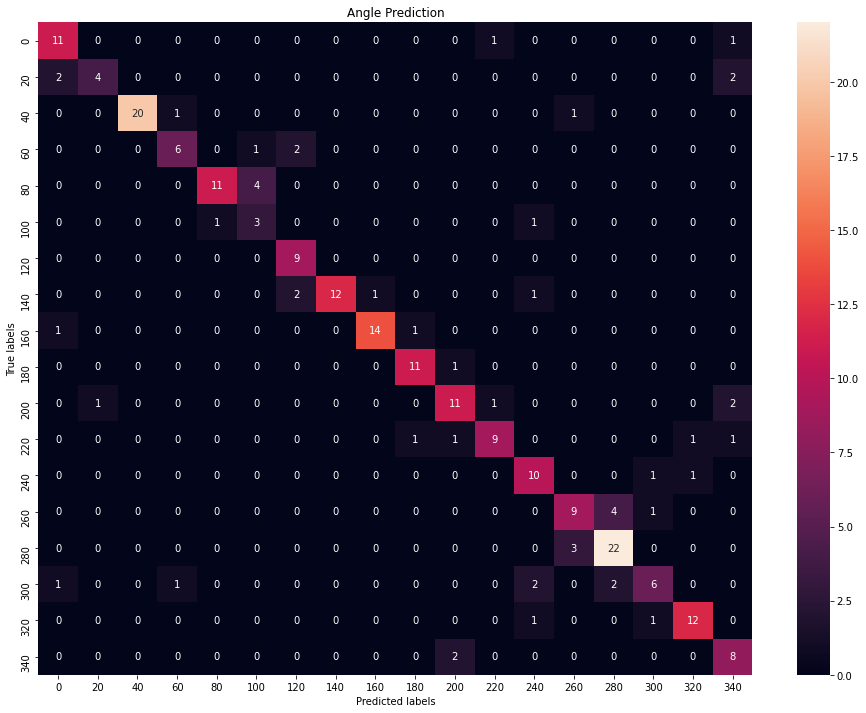

In [59]:
labels = [val for val in ang_dict.keys()]
import seaborn as sns   
conf_a = sk.confusion_matrix(t_a,p_a )
plt.figure(figsize = (16,12))
ax= plt.subplot()
sns.heatmap(conf_a, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Angle Prediction'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [31]:
def acc_extended(conf_matrix):
    subtract = 0
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            if np.abs(j-i)<2: subtract += conf_matrix[i, j]
    return np.sum(conf_matrix) - subtract

In [32]:
print(f'{100*(len(t_a)-acc_extended(conf_a))/len(t_a):2.0f}% accuracy within 30 degrees')

89% accuracy within 30 degrees


In [33]:
preds = model_d.predict(x_test)
t_d = [argmax(y3) for y3 in d_test]
p_d = [argmax(pr) for pr in preds]
sk.confusion_matrix(t_d,p_d )

array([[ 8,  1,  0,  0,  0,  0,  1,  0,  0,  1,  0,  1,  1,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  4,  2,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  4,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  4,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  8,  2,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  7,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  2,  7,  

In [52]:
vals = np.unique(np.array(d_binned).astype(int))
keys = np.array(range(len(vals)))
dist_dict =  {val:key for key, val in zip(keys, vals)}
dist_dict

{10: 0,
 20: 1,
 30: 2,
 40: 3,
 50: 4,
 60: 5,
 70: 6,
 80: 7,
 90: 8,
 100: 9,
 110: 10,
 120: 11,
 130: 12,
 140: 13,
 150: 14,
 160: 15,
 170: 16,
 180: 17,
 190: 18,
 200: 19,
 210: 20,
 220: 21,
 230: 22,
 240: 23,
 250: 24,
 260: 25,
 270: 26,
 280: 27,
 290: 28,
 300: 29}

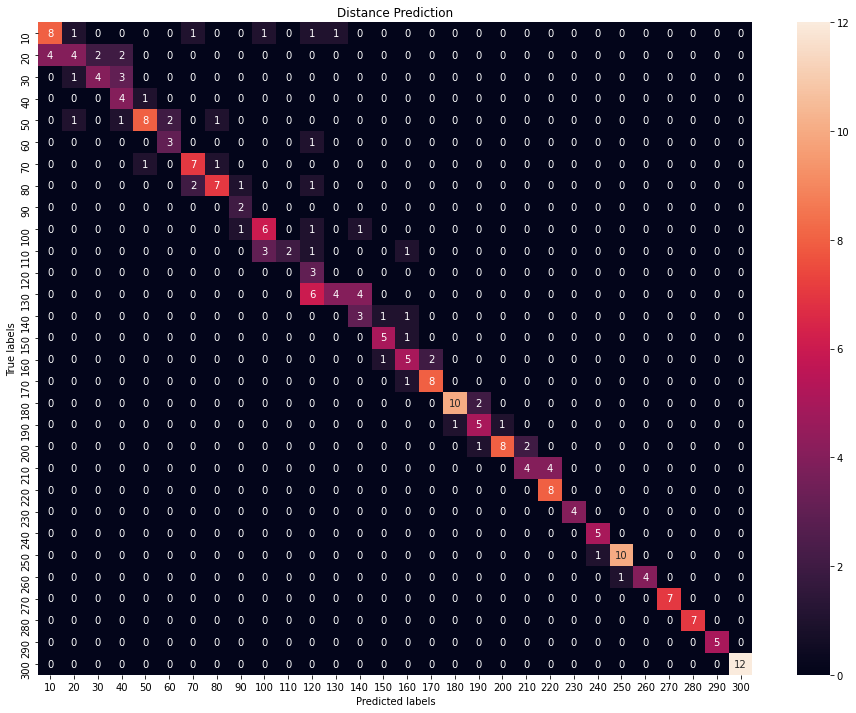

In [60]:
labels = [val for val in dist_dict.keys()]
import seaborn as sns   
conf_d = sk.confusion_matrix(t_d,p_d )
plt.figure(figsize = (16,12))
ax= plt.subplot()
sns.heatmap(conf_d, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Distance Prediction'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [61]:
print(f'{100*(len(t_a)-acc_extended(conf_d))/len(t_a):2.0f}% accuracy within 15 meters')

94% accuracy within 15 meters


In [44]:
model_a.save('saved_model/model_angle_1.h5')
model_d.save('saved_model/model_distance_1.h5')

In [ ]:
obs, sr = librosa.load('./AudioClips/'+files[2][20])
files[2][20]

In [ ]:
np.argmax(model.predict(np.reshape(obs[1000:16000], [1, 15000, 1])))

In [ ]:
y

In [ ]:
dictvals